In [1]:
import os
import glob as gb
import cv2
import keras
import tqdm
import glob
import skimage.io
import pandas as pd
import numpy as np
from tqdm import tqdm
from os import listdir
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from sklearn.utils import shuffle
import tensorflow 
import tensorflow as  tf
import seaborn as sns
from sklearn import metrics
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
trainpath = './Datasets/'


In [3]:
for folder in  os.listdir(trainpath) : 
    files = gb.glob(pathname= str( trainpath  + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')


For training data , found 220 in folder Fresh
For training data , found 220 in folder NonFresh


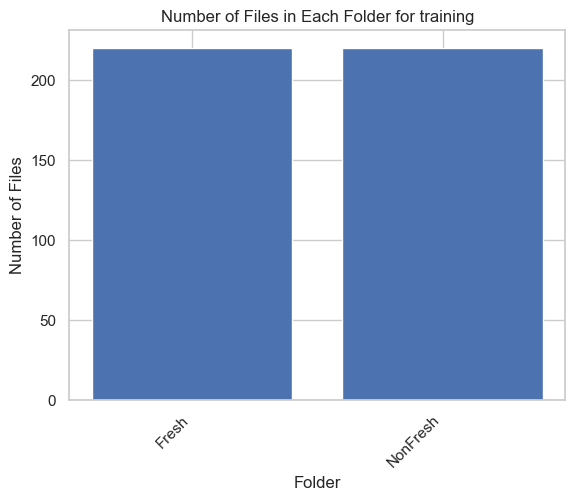

In [33]:
import os
import glob as gb
import matplotlib.pyplot as plt

trainpath = './Datasets/'

folder_counts = {}
for folder in os.listdir(trainpath):
    files = gb.glob(pathname=str(trainpath + folder + '/*.jpg'))
    folder_counts[folder] = len(files)

plt.bar(folder_counts.keys(), folder_counts.values())
plt.xlabel('Folder')
plt.ylabel('Number of Files')
plt.title('Number of Files in Each Folder for training')
plt.xticks(rotation=45, ha='right')
plt.show()


In [4]:

code = {'Fresh':0 ,'NonFresh':1}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x

In [5]:


size = []
for folder in  os.listdir(trainpath) : 
    files = gb.glob(pathname= str( trainpath + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()


(4000, 3000, 3)    400
(500, 500, 3)       40
Name: count, dtype: int64

In [6]:
s = 100


In [7]:
X_train = []
y_train = []
for folder in  os.listdir(trainpath) : 
    files = gb.glob(pathname= str( trainpath + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state = 42) 

In [9]:
print(f'we have {len(X_train)} items in X_train')


we have 352 items in X_train


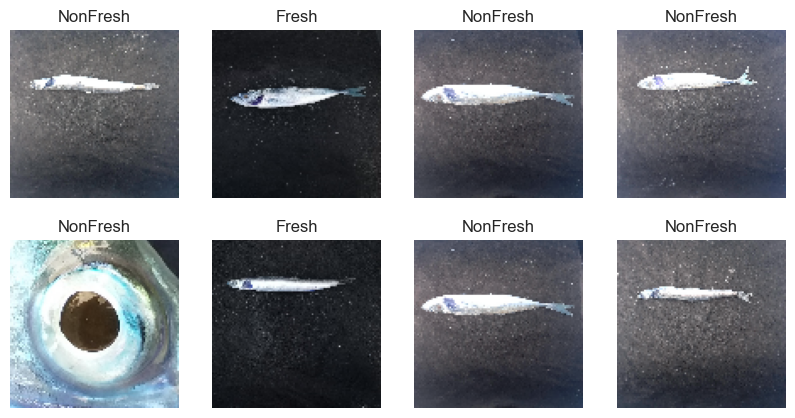

In [10]:

plt.figure(figsize=(10,5))
for n , i in enumerate(list(np.random.randint(0,len(X_train),8))) : 
    plt.subplot(2,4,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [11]:

print(f'we have {len(X_test)} items in X_test')


we have 88 items in X_test


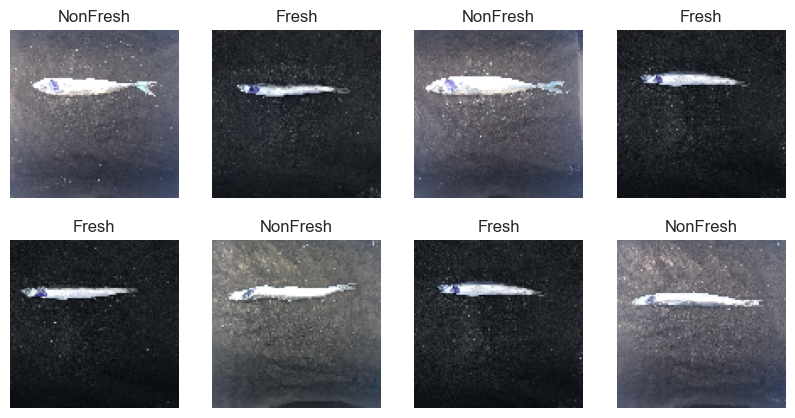

In [12]:


plt.figure(figsize=(10,5))
for n , i in enumerate(list(np.random.randint(0,len(X_test),8))) : 
    plt.subplot(2,4,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [13]:

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')

print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')


X_train shape  is (352, 100, 100, 3)
X_test shape  is (88, 100, 100, 3)
y_train shape  is (352,)
y_test shape  is (88,)


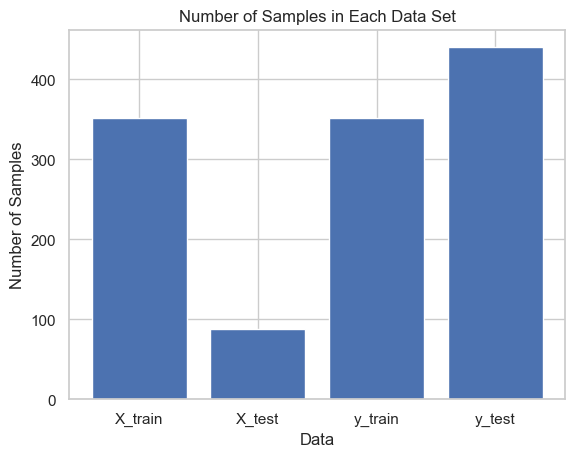

In [32]:
import matplotlib.pyplot as plt

data = [X_train, X_test, y_train, y_test]
labels = ['X_train', 'X_test', 'y_train', 'y_test']
sizes = [len(d) for d in data]

plt.bar(labels, sizes)
plt.xlabel('Data')
plt.ylabel('Number of Samples')
plt.title('Number of Samples in Each Data Set')
plt.show()


In [14]:

base_model = tf.keras.applications.MobileNetV2(input_shape=(100,100, 3),
    include_top=False)
base_model.trainable = False

modl = Flatten()(base_model.output)

modl = Dense(units=1024, activation ="relu")(modl)

modl = Dropout(0.2)(modl)

modl = Dense(units = 1, activation = "sigmoid")(modl)
modl = Model( base_model.input, modl)

In [15]:


datagen = ImageDataGenerator(
        rotation_range=10, 
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False)  


datagen.fit(X_train)



In [16]:

print('Model Details are : ')
print(modl.summary())

Model Details are : 
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 50, 50, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 50, 50, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 50, 50, 32)           0         ['bn_

 block_3_expand_relu (ReLU)  (None, 25, 25, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 27, 27, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 13, 13, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 13, 13, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 7, 7, 192)            768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 7, 7, 192)            0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 7, 7, 64)             12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 7, 7, 64)             256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 7, 7, 64)             0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 7, 7, 384)            24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 7, 7, 384)            1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 7, 7, 384)            0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 7, 7, 576)            0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 9, 9, 576)            0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 4, 4, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 4, 4, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 4, 4, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 4, 4, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [17]:
modl.compile(optimizer = RMSprop(learning_rate=1e-6), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [18]:
epochs = 10
mout = modl.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=epochs,batch_size=32,verbose=1)
modl.save('out.h5')

Epoch 1/10
11/11 [==============================] - 9s 574ms/step - loss: 0.8017 - accuracy: 0.5540 - val_loss: 0.5369 - val_accuracy: 0.7727
Epoch 2/10
11/11 [==============================] - 6s 512ms/step - loss: 0.4711 - accuracy: 0.7727 - val_loss: 0.3471 - val_accuracy: 0.8977
Epoch 3/10
11/11 [==============================] - 5s 502ms/step - loss: 0.3446 - accuracy: 0.8778 - val_loss: 0.2475 - val_accuracy: 0.9432
Epoch 4/10
11/11 [==============================] - 6s 510ms/step - loss: 0.2512 - accuracy: 0.9205 - val_loss: 0.1813 - val_accuracy: 0.9545
Epoch 5/10
11/11 [==============================] - 5s 491ms/step - loss: 0.2068 - accuracy: 0.9205 - val_loss: 0.1466 - val_accuracy: 0.9545
Epoch 6/10
11/11 [==============================] - 5s 500ms/step - loss: 0.1498 - accuracy: 0.9545 - val_loss: 0.1223 - val_accuracy: 0.9545
Epoch 7/10
11/11 [==============================] - 5s 483ms/step - loss: 0.1338 - accuracy: 0.9602 - val_loss: 0.1014 - val_accuracy: 0.9545
Epoch 

C:\Users\sriga\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


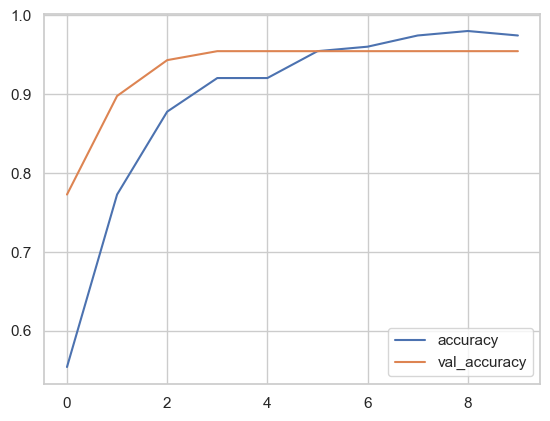

In [19]:
plt.plot(mout.history['accuracy'], label='accuracy')
plt.plot(mout.history['val_accuracy'], label='val_accuracy')
plt.legend()

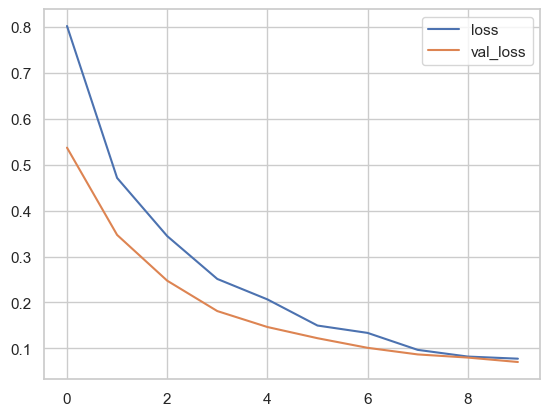

In [20]:
plt.plot(mout.history['loss'], label='loss')
plt.plot(mout.history['val_loss'], label='val_loss')
plt.legend()

In [21]:
y_actual=[]
y_test=[]
pthh=trainpath+"Fresh"
for i in os.listdir(pthh):
    img=cv2.imread(pthh+"/"+i)
    img=cv2.resize(img, (100,100), interpolation=cv2.INTER_CUBIC)
    img=np.array(img)
    #img=img/255
    img=np.expand_dims(img,axis=0)
    p=modl.predict(img,verbose=0)

    y_test.append(round(p[0][0]))
    y_actual.append(0)
    
pthh=trainpath+"NonFresh"
for i in os.listdir(pthh):
    img=cv2.imread(pthh+"/"+i)
    img=cv2.resize(img, (100,100), interpolation=cv2.INTER_CUBIC)
    img=np.array(img)
    #img=img/255
    img=np.expand_dims(img,axis=0)
    p=modl.predict(img,verbose=0)

    y_test.append(round(p[0][0]))
    y_actual.append(1)

Accuracy: 97.5 %
Precision: 0.97551
Recall: 0.975
F1 Score: 0.97501


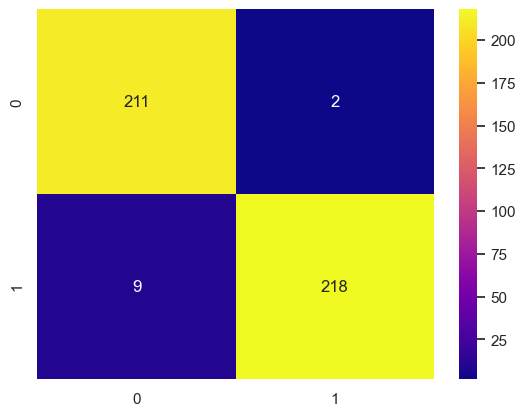

In [22]:
cm=metrics.confusion_matrix(y_test, y_actual)
sns.heatmap(cm,cmap="plasma",fmt="d",annot=True)
print('Accuracy:', np.round(metrics.accuracy_score(y_test,y_actual),5)*100,"%")
print('Precision:', np.round(metrics.precision_score(y_test,y_actual, average='weighted'),5))
print('Recall:', np.round(metrics.recall_score(y_test,y_actual, average='weighted'),5))
print('F1 Score:', np.round(metrics.f1_score(y_test,y_actual, average='weighted'),5))

3/3 [==============================] - 1s 234ms/step


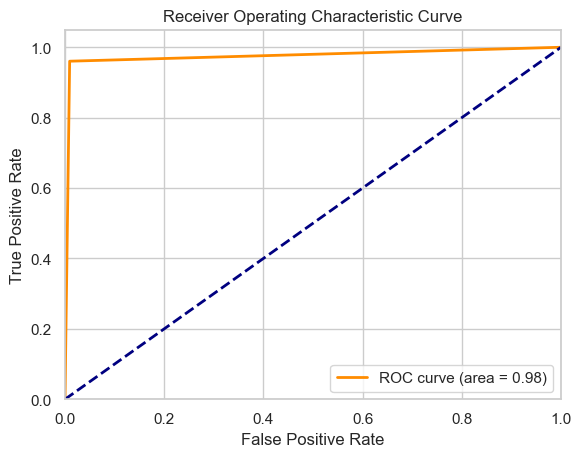

In [24]:
# Assuming modl is your model
y_scores = modl.predict(X_test)  # Assuming this gives the predicted probabilities

fpr, tpr, thresholds = roc_curve(y_test, y_actual)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


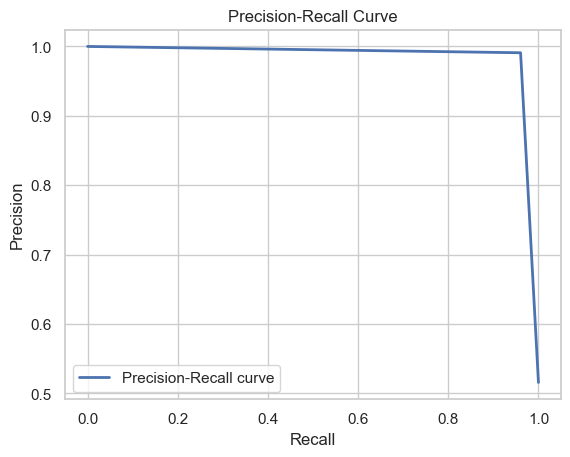

Average Precision Score: 0.9720764917901482


In [25]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_actual)
average_precision = average_precision_score(y_test, y_actual)

plt.plot(recall, precision, color='b', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

print('Average Precision Score:', average_precision)


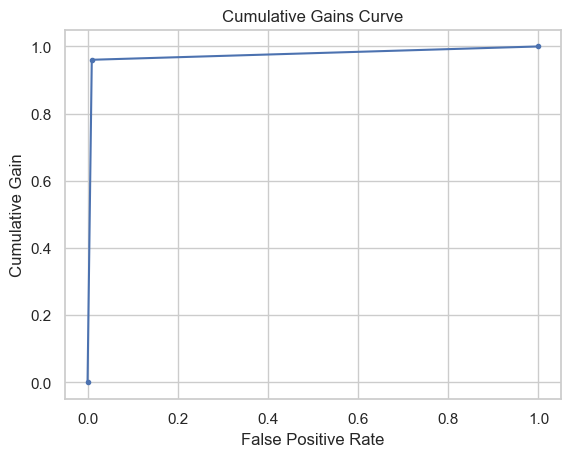

In [28]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Plot Cumulative Gains Curve
fpr, tpr, _ = roc_curve(y_test, y_actual)
cumulative_gain = tpr

plt.plot(fpr, cumulative_gain, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('Cumulative Gain')
plt.title('Cumulative Gains Curve')
plt.show()


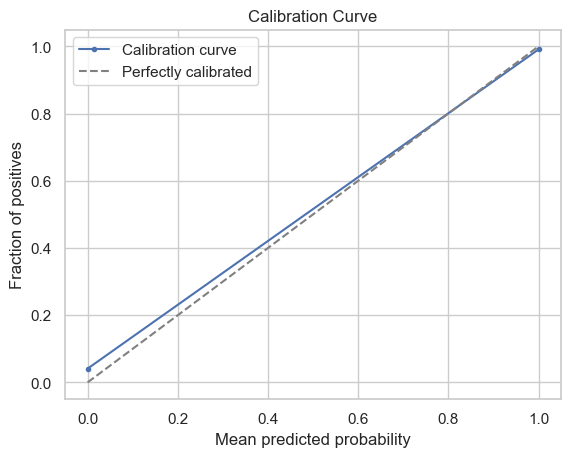

In [29]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

prob_true, prob_pred = calibration_curve(y_test, y_actual, n_bins=10)
plt.plot(prob_pred, prob_true, marker='.', label='Calibration curve')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curve')
plt.legend(loc='upper left')
plt.show()
